# Final project, PHYS 514, Fall 2017
Shannon Moran

This project seeks to replicate the paper: 

> Waagen, A., D’Souza, R. M., & Lu, T.-C. (2017). Explosive percolation on directed networks due to monotonic flow of activity. Physical Review E, 96(1). https://doi.org/10.1103/physreve.96.012317

In addition to this notebook, I've submitted my final presentation, annotated versions of all the code used, and a brief report further outlining the methods used and limitations of the findings.  

Contents of this notebook & file of code used:
- Methods
    - Import packages needed for simulation
    - Percolation process: `graphs.py`
    - Cluster definition and algorithms: `clustering.py`
    - Critical exponents: `critical_exponents.py`
- Results and discussion: `figs.py`
    - Figures 5&6: Evolution of largest SCC versus edge density
    - Figure 8: Formation of largest cluster formation in C-ODER process 
    - Figure 7: Critical exponent of maximum jump size
- Appendix: Replicating ODER on larger system using `Networkx`

# Methods
All code has been extensively commented/annotated. Here, I show the output of the methods I implemented.

In the "Results and discusion", I will then use these methods to replicate figures from Waagen, et al.

## Import packages needed for simulation

In [1]:
# Auto-reloads external files any changes are automatically reflected
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

## Percolation process

Visualize adjacency matrices for each algorithm

In [2]:
import graphs as g

In [3]:
n = int(1e2)
edge_density = 50

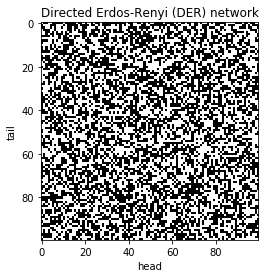

In [4]:
# Directed Erdos-Renyi (DER)

DER_viz = g.Graph(n,edge_density*n,'DER')
DER_viz.build()

plt.imshow((DER_viz.edges>0),cmap='binary')
plt.title('Directed Erdos-Renyi (DER) network')
plt.ylabel('tail')
plt.xlabel('head')
plt.show()

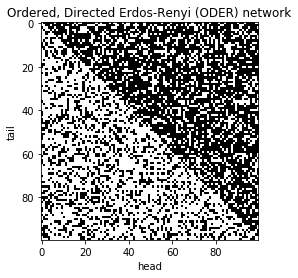

In [5]:
# Ordered DER (ODER)

ODER_viz = g.Graph(n,edge_density*n,'ODER')
ODER_viz.build()

plt.imshow((ODER_viz.edges>0),cmap='binary')
plt.title('Ordered, Directed Erdos-Renyi (ODER) network')
plt.ylabel('tail')
plt.xlabel('head')
plt.show()

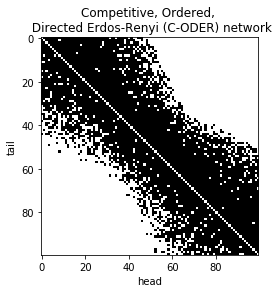

In [6]:
# Competitive, Ordered DER (C-ODER)

CODER_viz = g.Graph(n,edge_density*n,'C-ODER')
CODER_viz.build()

plt.imshow((CODER_viz.edges>0),cmap='binary')
plt.title('Competitive, Ordered, \n Directed Erdos-Renyi (C-ODER) network')
plt.ylabel('tail')
plt.xlabel('head')
plt.show()

## Cluster definitions and algorithms

Used Tarjan's Algorithm.

In [7]:
from clustering import *

In [8]:
n = int(10)
edge_density = 2

ODER_cluster_ex = g.Graph(n,edge_density*n,'ODER')
ODER_cluster_ex.build()

In [9]:
# Output list of edges to validate code works

edges = matrix_to_tuples(ODER_cluster_ex.edges)
print(edges)

[(1, 2), (1, 6), (1, 10), (2, 4), (2, 5), (2, 8), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 9), (4, 10), (6, 7), (6, 8), (6, 9), (7, 9), (7, 10), (8, 6), (9, 10)]


In [10]:
SCCs = tarjan(ODER_cluster_ex.edges)
largest_SCC = sorted(SCCs,key=len,reverse=True)[0]

print('Number of SCCs: %s' %len(SCCs))
print('Number of nodes in largest SCC: %s' %ranked_SCC(SCCs))

print('Nodes in largest SCC: ')
print(sorted(largest_SCC))

Number of SCCs: 9
Number of nodes in largest SCC: 2
Nodes in largest SCC: 
[5, 7]


Ultimately, my implementation of the Tarjan's Algorithm limited the size of system I was able to explore.

For systems of `n>1E3`, I generated the following error:
```
Fatal Python error: Cannot recover from stack overflow.

Current thread 0x00007fff78a8b000 (most recent call first):
  File ".../code/clustering.py", line 45 in calc_component
  ...
  Abort trap: 6
```

This error is occuring in `calc_component`, which is the recursion in my algorithm.

However, when I implemented my graphs using `Networkx` and clustered using `nx.strongly_connected_components` (which does not use recursion), I was able to easily handle sizes of `n=1E4` with edge densities of 50. An example of this is included for completeness at the end of this document.

## Critical exponents

The authors implement a binary search to find the largest jump due to the addition of one edge without calculating the largest SCC after every edge addition. 

I naively validate these algorithms by printing the largest SCC for the start, middle, and end of each step of the binary search.
    - 'Edge number': Edges are numbered by the order in which they were added
    - 'Largest SCC': Number of nodes in the largest strongly connected component of the graph up to that edge number

In [11]:
from critical_exponents import *

In [12]:
n = int(1e2)
edge_density = 50
CODER_jump = g.Graph(n,edge_density*n,'C-ODER')
CODER_jump.build()

In [13]:
largest_jump = get_largest_jump(CODER_jump,True)
print('Largest SCC size jump due to the addition of one edge is: %s' %largest_jump)

Edge numbers: 1, 2500, 4999
Largest SCC: 1, 100, 100
Edge numbers: 1, 1250, 2500
Largest SCC: 1, 100, 100
Edge numbers: 1, 626, 1250
Largest SCC: 1, 95, 100
Edge numbers: 1, 314, 626
Largest SCC: 1, 40, 95
Edge numbers: 314, 470, 626
Largest SCC: 40, 43, 95
Edge numbers: 470, 548, 626
Largest SCC: 43, 56, 95
Edge numbers: 548, 587, 626
Largest SCC: 56, 95, 95
Edge numbers: 548, 568, 587
Largest SCC: 56, 56, 95
Edge numbers: 568, 578, 587
Largest SCC: 56, 56, 95
Edge numbers: 578, 582, 587
Largest SCC: 56, 95, 95
Edge numbers: 578, 580, 582
Largest SCC: 56, 56, 95
Edge numbers: 580, 581, 582
Largest SCC: 56, 95, 95
Edge numbers: 580, 580, 581
Largest SCC: 56, 56, 95
Largest SCC size jump due to the addition of one edge is: 39


# Results and discussion

I call the above functions to replicate the figures found in the paper by Waagen et al.

In [16]:
import figs as f

## Figures 5&6: Evolution of largest SCC versus edge density

While I'm able to replicate the shape of these curves for both ODER and C-ODER processes, the "critical edge density" I find is much smaller than that found the paper. Additionally, I find that the curve shifts to the left with increasing system size.

Thus, I suspect that my disagreement with the paper is due to the paper running a system with many more nodes.

In [ ]:
'''
Actual settings in the paper:
n = int(1e6)
edge_densities = np.linspace(1,50,100)
replicates = 10
'''

In [17]:
# n = [int(1e2), int(1e3])
edge_densities = np.linspace(1,25,50)
replicates = 10

### ODER
From Waagen et al, `n=1E6`:
![fig5](figs/paper/fig5.png)

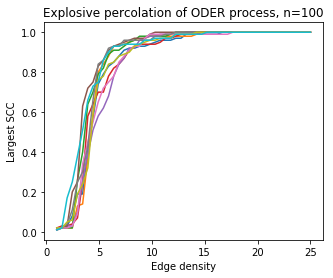

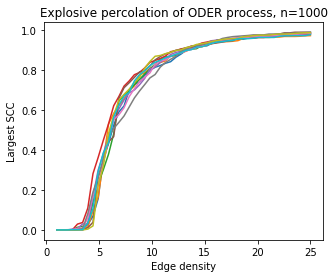

In [18]:
n = int(1e2)
f.figure56('ODER',n,edge_densities,replicates)

n = int(1e3)
f.figure56('ODER',n,edge_densities,replicates)

### C-ODER
From Waagen et al, `n=1E6`:
![fig6](figs/paper/fig6.png)

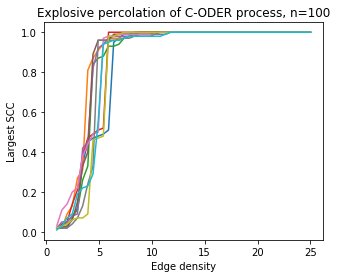

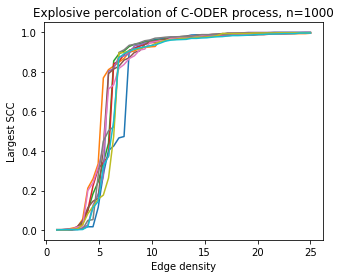

In [19]:
n = int(1e2)
f.figure56('C-ODER',n,edge_densities,replicates)

n = int(1e3)
f.figure56('C-ODER',n,edge_densities,replicates)

## Figure 7

I am able to very closely replicate the values found in the paper for the maximum jump size, for both ODER and C-ODER processes.

In [ ]:
'''
Actual settings in the paper:
edge_density = 50
n = np.linspace(1e5,1e6,7).astype(int)
replicates = 40
'''

In [23]:
edge_density = 50
n = np.linspace(1e2,1e3,10).astype(int)
replicates = 40

### ODER
From Waagen et al:
![fig7-ODER](figs/paper/fig7-ODER.png)

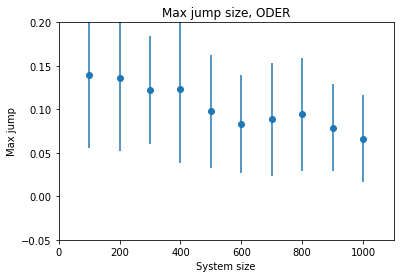

In [24]:
f.figure7('ODER',n,edge_density,replicates)

### C-ODER
From Waagen et al:
![fig7-CODER](figs/paper/fig7-CODER.png)

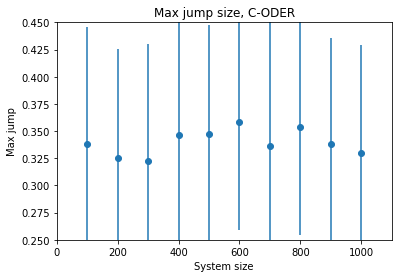

In [25]:
f.figure7('C-ODER',n,edge_density,replicates)

## Figure 8: Formation of largest cluster formation in C-ODER process 

I am able to very closely replicate the finding that the large SCC jump found in the C-ODER graph formation is due to the combination of the largest and second largest clusters-- however, as before, I find this "critical edge density" to be much lower than that foudn in the paper.

This further reinforces that edge density is not a good proxy for the site occupancy probability $p$ found in lattice percolation systems. In those systems, $p_c$ does not vary with the size of the system-- unlikely the behavior of the "critical edge density" I find here.

From Waagen et al:
![fig8](figs/paper/fig8.png)

In [20]:
edge_densities = np.linspace(1,25,50)

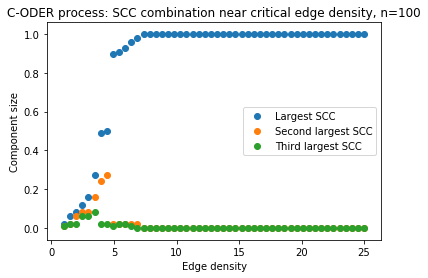

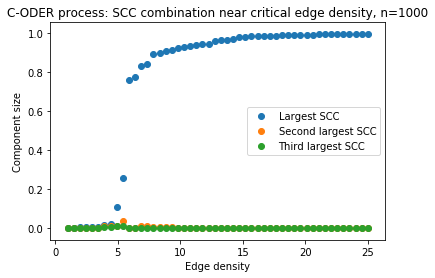

In [21]:
n = int(1e2)
f.figure8('C-ODER',n,edge_densities)

n = int(1e3)
f.figure8('C-ODER',n,edge_densities)

# Appendix: Implementing ODER Figure 5 with Networkx

Warning-- these take quite a while to run. The result of running the below for 5 replicates is:
![networkx-results](figs/myresults/networkx.png)

Because the graph is completely re-initialized for each increase in edge density using Networkx, the fraction in the largest SCC does not always monotonically increase, due to a different random initialized graph!

In [ ]:
from tqdm import tqdm_notebook

class nxGraph(object):

    def __init__(self,n,m,process_name):
        self.n = int(n)
        self.m = int(m)
        self.n_list = np.linspace(0,self.n-1,self.n).astype(int)
        self.edge_density = self.m/self.n
        self.nodes = 0
        self.process = process_name

    def build(self):
        if self.process=='ODER': self.ODER()
        else: print('build with a valid process')

    def check_edge(self,p):
        if self.G.has_edge(p[0],p[1]):
            if self.G.has_edge(p[1],p[0]): pass
            else: self.G.add_edge(p[1],p[0]); self.nodes += 1
        else: self.G.add_edge(p[0],p[1]); self.nodes += 1

    def ODER(self):
        pbar = tqdm_notebook(total=(self.m-self.nodes),desc="Building ODER graph")
        self.G = nx.DiGraph()
        self.G.add_nodes_from(range(self.n))
        while self.nodes<self.m:
            first_node, second_node = random.sample(list(self.n_list),2)
            proposed_edge = tuple(sorted((first_node,second_node)))
            n0 = self.nodes
            self.check_edge(proposed_edge)
            pbar.update(self.nodes-n0)
        pbar.close()

In [ ]:
def figure56_nx(process,n,edge_densities,replicates):
    for replicate in range(replicates):
        largest_scc = []
        for density in edge_densities:
            Sample = nxGraph(n,round(density*n),process)
            Sample.build()
            max_scc = len(max(nx.strongly_connected_components(Sample.G), key=len))/n
            largest_scc.append(max_scc)
        plt.plot(edge_densities,largest_scc)
    plt.title('Explosive percolation of %s process, n=%d' %(process,n))
    plt.ylabel('Largest SCC')
    plt.xlabel('Edge density')
    plt.show()

In [ ]:
edge_densities = np.linspace(1,25,25)
replicates = 3
n = int(1e4)

In [ ]:
figure56_nx('ODER',n,edge_densities,replicates)